In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
df=pd.read_csv("https://raw.githubusercontent.com/KeithGalli/matplotlib_tutorial/master/fifa_data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [104]:
values_v=[]
for value in df["Value"]:
    if "." in value:
        value=value.replace("M","00000")
#        print(value)
        values_v.append(value)
    else:
        value=value.replace("M","000000")
 #       print(value)
        values_v.append(value)

In [105]:
df["Release Clause"]=df["Release Clause"].astype('str')

In [106]:
values=[]
for value in df["Release Clause"]:
    if "." in value:
        value=value.replace("M","00000")
#        print(value)
        values.append(value)
    else:
        value=value.replace("M","000000")
 #       print(value)
        values.append(value)

In [107]:
df["Value"]=values_v
df["Release Clause"]=values

In [108]:
df["Value"]

0        €110.500000
1          €77000000
2        €118.500000
3          €72000000
4         €102000000
            ...     
18202           €60K
18203           €60K
18204           €60K
18205           €60K
18206           €60K
Name: Value, Length: 18207, dtype: object

In [109]:
df["Value"]=df["Value"].str.replace("€","")
df["Release Clause"]=df["Release Clause"].str.replace("€","")

In [110]:
df["Value"]=df["Value"].str.replace("K","")
df["Release Clause"]=df["Release Clause"].str.replace("K","")

In [111]:
df["Value"]=df["Value"].str.replace(".","")
df["Release Clause"]=df["Release Clause"].str.replace(".","")

/var/folders/lv/5hlry00j1vl3lmxtg4gj8r6r0000gn/T/ipykernel_73250/2324442662.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Value"]=df["Value"].str.replace(".","")
/var/folders/lv/5hlry00j1vl3lmxtg4gj8r6r0000gn/T/ipykernel_73250/2324442662.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Release Clause"]=df["Release Clause"].str.replace(".","")


In [112]:
df["Release Clause"]

0        226500000
1        127100000
2        228100000
3        138600000
4        196400000
           ...    
18202          143
18203          113
18204          165
18205          143
18206          165
Name: Release Clause, Length: 18207, dtype: object

In [113]:
df["Release Clause"]=df["Release Clause"].fillna(0)

In [115]:
series=df["Release Clause"]

In [119]:
series.isna().sum()

0

In [120]:
df["Value"]=df["Value"].astype("int")

In [123]:
df["Release Clause"]=df["Release Clause"].astype("float")

In [124]:
df["Wage"]=df["Wage"].str.replace("€","")

In [125]:
df["Wage"]=df["Wage"].str.replace("K","")
df["Wage"]=df["Wage"].astype("int")

In [126]:
grouped=df.groupby("Nationality",sort=False)

In [127]:
data_plot=grouped.agg({"Name":"count","Overall":["median","mean"],"Wage":["median","mean"]})

In [128]:
data_plot.columns=data_plot.columns.droplevel(0)

In [129]:
data_plot.columns=["Players_Count","Overall_Median","Overall_Mean","Wage_Median","Wage_Mean"]

In [130]:
data_plot

,Players_Count,Overall_Median,Overall_Mean,Wage_Median,Wage_Mean
Nationality,,,,,
Argentina,937,69.0,68.572038,6.0,11.502668
Portugal,322,71.0,71.344720,6.0,14.310559
Brazil,827,71.0,71.251511,10.0,17.778718
Spain,1072,69.0,69.698694,6.0,16.322761
Belgium,260,68.0,68.811538,6.0,18.480769
...,...,...,...,...,...
Malta,1,61.0,61.000000,2.0,2.000000
Belize,1,60.0,60.000000,1.0,1.000000
South Sudan,1,60.0,60.000000,2.0,2.000000


<AxesSubplot:title={'center':'Diffrence between Median and Mean of Wage'}, xlabel='Nationality'>

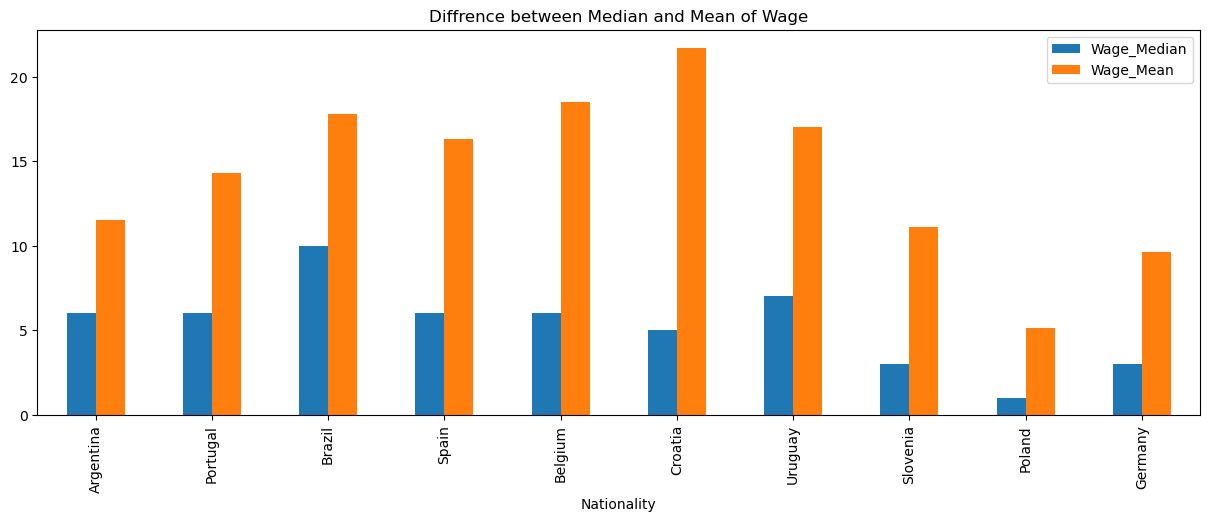

In [137]:
data_plot[:10].plot(y=["Wage_Median","Wage_Mean"],figsize=(15,5),kind="bar",title="Diffrence between Median and Mean of Wage")

<AxesSubplot:xlabel='Overall', ylabel='Release Clause'>

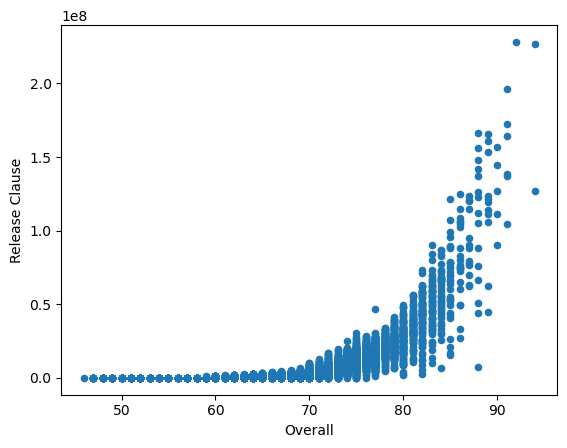

In [138]:
df.plot(kind="scatter",x="Overall", y="Release Clause")

In [135]:
heat=df[["Overall","Wage","Potential","Value","Release Clause"]].corr()

<AxesSubplot:>

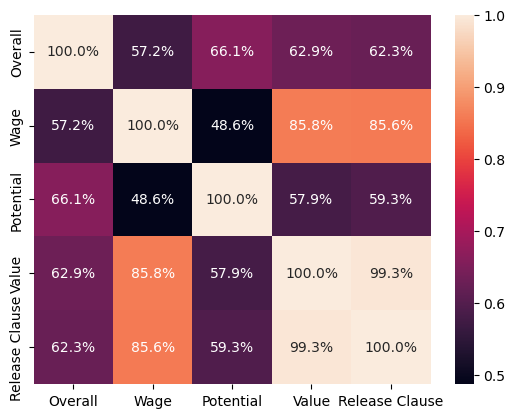

In [136]:
sns.heatmap(heat,annot=True, fmt=".1%")